In [95]:
import pandas as pd

# Instagram image extraction

In [96]:
import instaloader

In [97]:
L = instaloader.Instaloader()

In [102]:
#L.login("login","login")

In [99]:
L = instaloader.Instaloader()
profile = instaloader.Profile.from_username(L.context, "thylacine_music").get_posts()

In [103]:
for post in profile:
    L.download_post(post, "thylacine_music")

thylacine_music/2020-09-28_11-35-10_UTC_1.jpg thylacine_music/2020-09-28_11-35-10_UTC_2.jpg [I’ve upgraded my toys 🕹 Still…] comments json 
thylacine_music/2020-09-25_10-21-06_UTC.jpg [TIMELESS is arriving in exact…] geo comments json 
thylacine_music/2020-09-18_15-36-48_UTC_1.jpg thylacine_music/2020-09-18_15-36-48_UTC_2.jpg thylacine_music/2020-09-18_15-36-48_UTC_2.mp4 [Sheremetiev music & video is …] comments json 
thylacine_music/2020-09-15_09-33-55_UTC.jpg [D-3 : Sheremetiev, a music vi…] thylacine_music/2020-09-15_09-33-55_UTC.mp4 comments json 
thylacine_music/2020-09-09_09-23-31_UTC_1.jpg thylacine_music/2020-09-09_09-23-31_UTC_2.jpg [Thanks to everyone who watche…] comments json 
thylacine_music/2020-07-17_08-34-00_UTC_1.jpg thylacine_music/2020-07-17_08-34-00_UTC_2.jpg thylacine_music/2020-07-17_08-34-00_UTC_2.mp4 [Allegri is out !! A track I r…] comments json 
thylacine_music/2020-06-22_10-22-09_UTC.jpg [Missing travels. Tjørnuvík be…] comments json 
thylacine_music/2020-05-

KeyboardInterrupt: 

# Image analysis

In [44]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

In [50]:
image = cv2.imread('2020-11-27_12-36-16_UTC_2.jpg')

In [51]:
image.shape

(720, 720, 3)

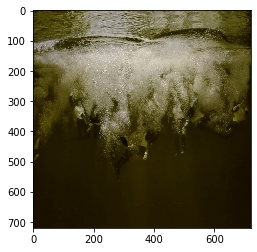

In [52]:
plt.imshow(image)

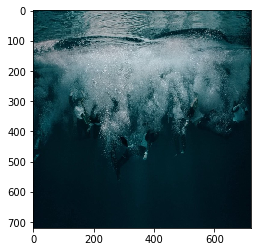

In [55]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [56]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [57]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [89]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]
    
    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

44.74072154674763

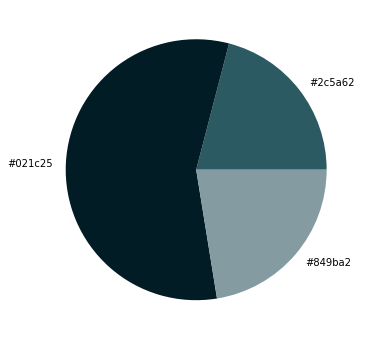

In [92]:
get_colors(get_image('2020-11-27_12-36-16_UTC_2.jpg'), 3, True)

In [ ]:
def rgb_to_hsl(r, g, b):
    r = float(r)
    g = float(g)
    b = float(b)
    high = max(r, g, b)
    low = min(r, g, b)
    h, s, v = ((high + low) / 2,)*3

    if high == low:
        h = 0.0
        s = 0.0
    else:
        d = high - low
        s = d / (2 - high - low) if l > 0.5 else d / (high + low)
        h = {
            r: (g - b) / d + (6 if g < b else 0),
            g: (b - r) / d + 2,
            b: (r - g) / d + 4,
        }[high]
        h /= 6

    return h, s, v

[44.45204124 90.71375141 97.95691924]
[132.36134469 155.58683089 162.31479904]
[ 2.36145619 28.78056792 37.45042332]


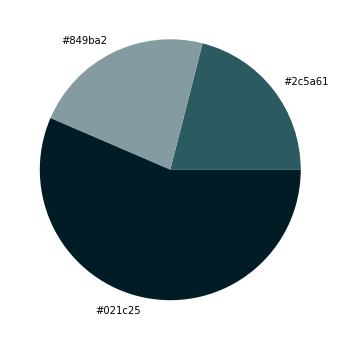

In [78]:
for i in get_colors(get_image('2020-11-27_12-36-16_UTC_2.jpg'), 3, True):
    print(i)

In [ ]:
imgHLS = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)

In [88]:
import colorsys

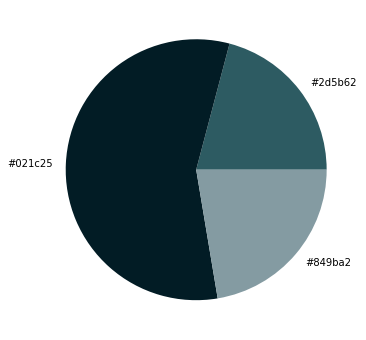

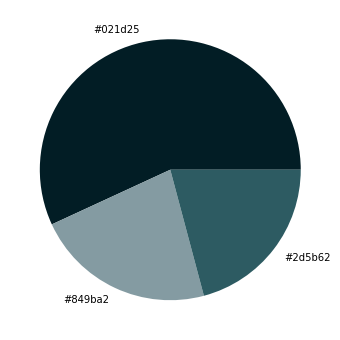

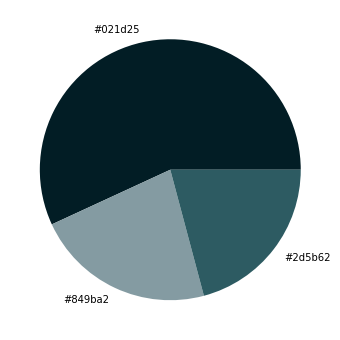

In [93]:
hlsval = colorsys.rgb_to_hls(get_colors(get_image('2020-11-27_12-36-16_UTC_2.jpg'), 3, True)[0][0],get_colors(get_image('2020-11-27_12-36-16_UTC_2.jpg'), 3, True)[0][1],get_colors(get_image('2020-11-27_12-36-16_UTC_2.jpg'), 3, True)[0][2])

In [94]:
print(hlsval)

(0.91051364159974, 37.134773322933526, -0.22329939118396364)
